In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import sklearn as sk

In [108]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# reading XLSX

In [109]:
df = pd.read_excel(
    "Telco_Churn.xlsx"
)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### dataframe shape and gaps

In [110]:
df.shape

(7043, 33)

In [111]:
print("Уникальные штаты:", df['State'].unique())
print("Уникальные страны:", df['Country'].unique())
print("Количество уникальных городов:", df['City'].nunique())

Уникальные штаты: ['California']
Уникальные страны: ['United States']
Количество уникальных городов: 1129


In [112]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [113]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [114]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [116]:
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors='coerce')

In [117]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [118]:
print(df["Country"].value_counts())
print(df["State"].value_counts())
print(df["City"].value_counts())

Country
United States    7043
Name: count, dtype: int64
State
California    7043
Name: count, dtype: int64
City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64


Выбрасываем ненужные, потенциально линейно-зависимые и малоинформативные признаки

In [119]:
drop_columns = ["CustomerID", "Count", "Country", "State", "Lat Long", "Latitude", "Longitude"]
df = df.drop(drop_columns, axis=1)
df.head()

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,Los Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [120]:
import dtale

d = dtale.show(df)
d.open_browser()

In [121]:
len(df["City"].unique())

1129

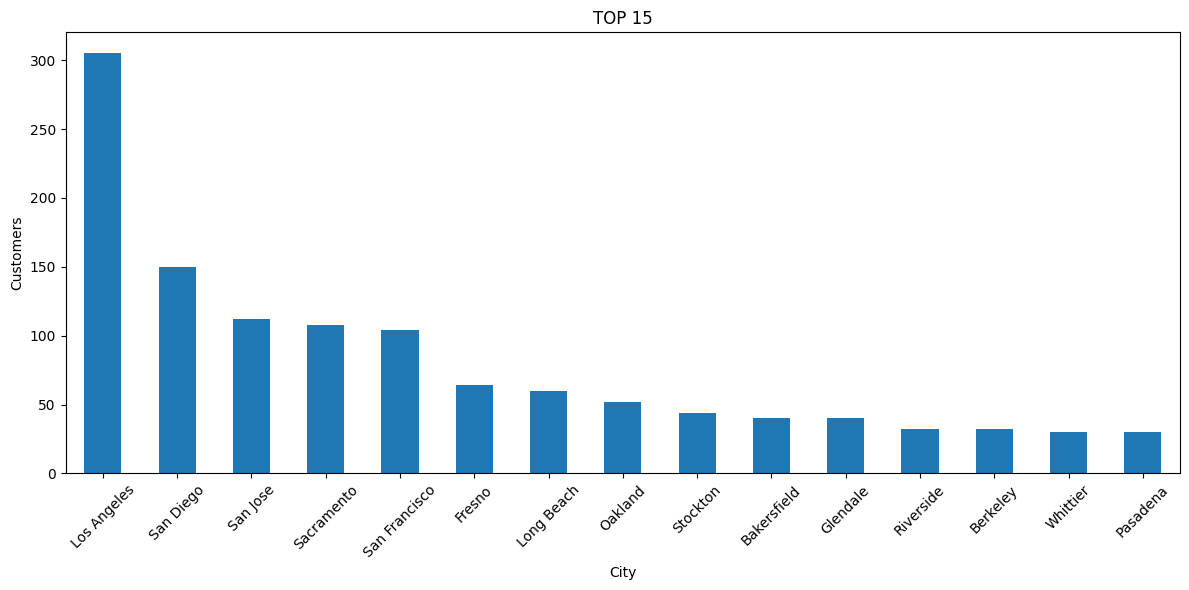

In [122]:
top_cities = df["City"].value_counts().head(15)
plt.figure(figsize=(12, 6))
top_cities.plot(kind="bar")
plt.title("TOP 15")
plt.xlabel("City")
plt.ylabel("Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

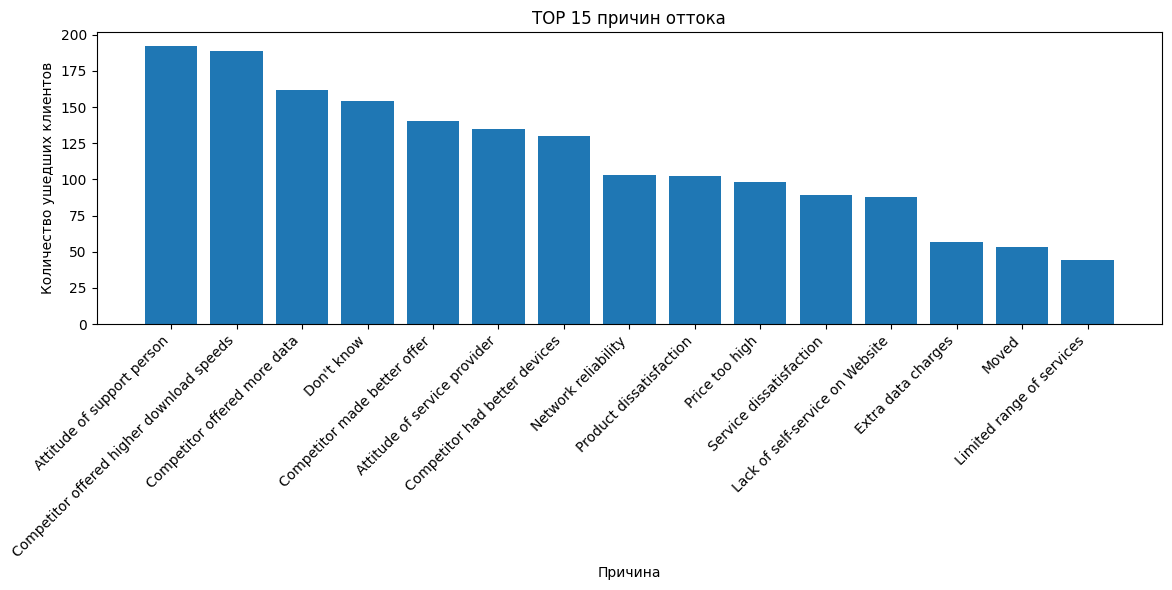

In [123]:
plt.figure(figsize=(12, 6))
top_reasons = df["Churn Reason"].dropna().value_counts().head(15)

plt.bar(top_reasons.index, top_reasons.values)
plt.title("TOP 15 причин оттока")
plt.xlabel("Причина")
plt.ylabel("Количество ушедших клиентов")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [124]:
df["Total Charges"].fillna(value=df["Total Charges"].median(), inplace=True)
df["Churn Reason"].fillna(value=" ", inplace=True)


/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/783752211.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/8g/hrr0dtn57lb04xhx37szq0k00000gn/T/ipykernel_96264/783752211.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df


Tenure Months:
  Тип данных: int64
  Уникальные значения: [ 2  8 28 49 10  1 47 17  5 34]
  Пропуски: 0
  Строковых значений: 0

Monthly Charges:
  Тип данных: float64
  Уникальные значения: [ 53.85  70.7   99.65 104.8  103.7   55.2   39.65  20.15  99.35  30.2 ]
  Пропуски: 0
  Строковых значений: 0

Total Charges:
  Тип данных: float64
  Уникальные значения: [ 108.15  151.65  820.5  3046.05 5036.3   528.35   39.65   20.15 4749.15
   30.2 ]
  Пропуски: 0
  Строковых значений: 0

Churn Score:
  Тип данных: int64
  Уникальные значения: [ 86  67  84  89  78 100  92  77  97  74]
  Пропуски: 0
  Строковых значений: 0

CLTV:
  Тип данных: int64
  Уникальные значения: [3239 2701 5372 5003 5340 5925 5433 4832 5789 2915]
  Пропуски: 0
  Строковых значений: 0


<Figure size 1200x800 with 0 Axes>

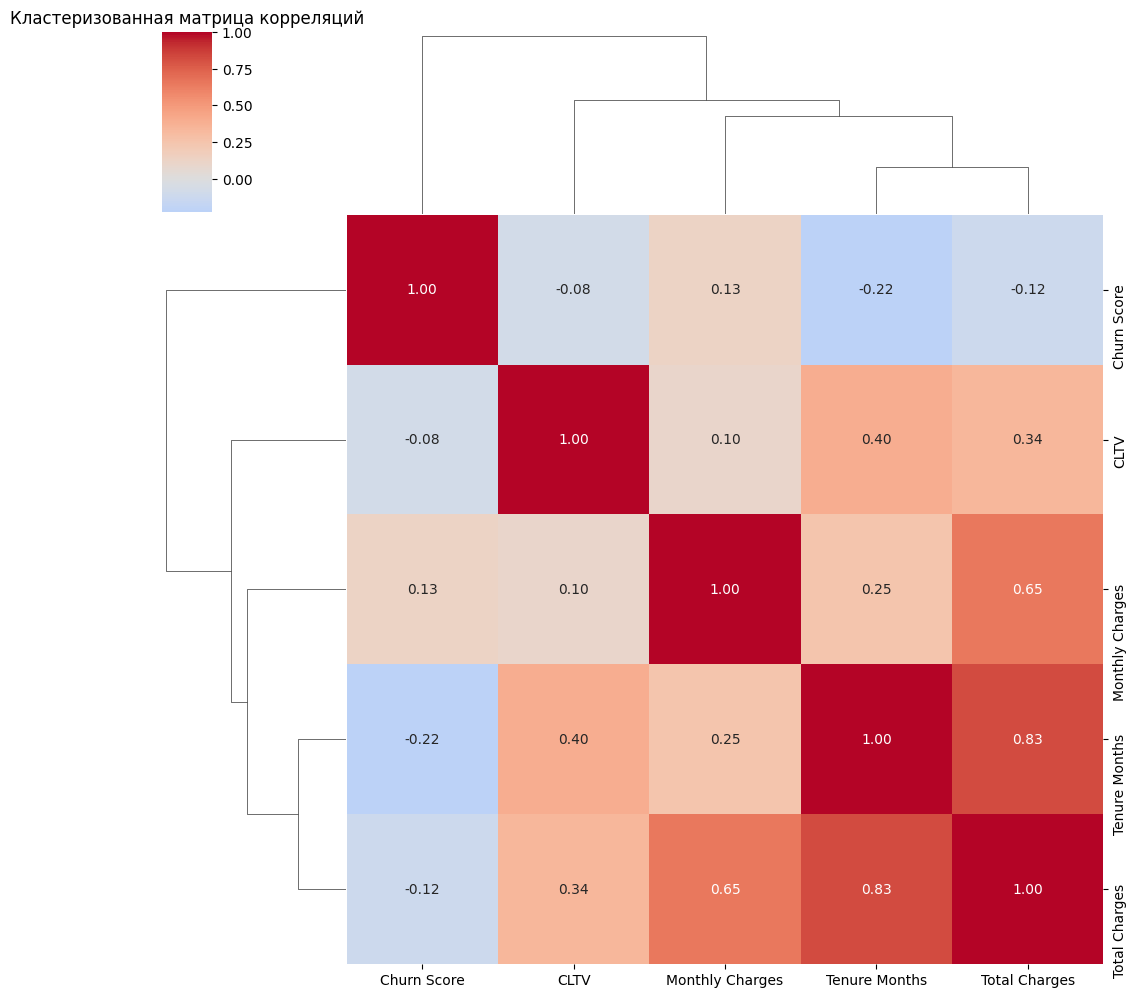

In [ ]:
numeric_columns = [ 
    "Tenure Months",
    "Monthly Charges", 
    "Total Charges",
    "Churn Score",
    "CLTV"
]


for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  Тип данных: {df[col].dtype}")
    print(f"  Уникальные значения: {df[col].unique()[:10]}")
    print(f"  Пропуски: {df[col].isnull().sum()}")
    
    string_values = df[col].apply(lambda x: isinstance(x, str)).sum()
    print(f"  Строковых значений: {string_values}")



numeric_df = df[numeric_columns]
plt.figure(figsize=(12, 8))
sns.clustermap(
    numeric_df.corr(), 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt='.2f'
)

plt.title('Кластеризованная матрица корреляций')
plt.show()

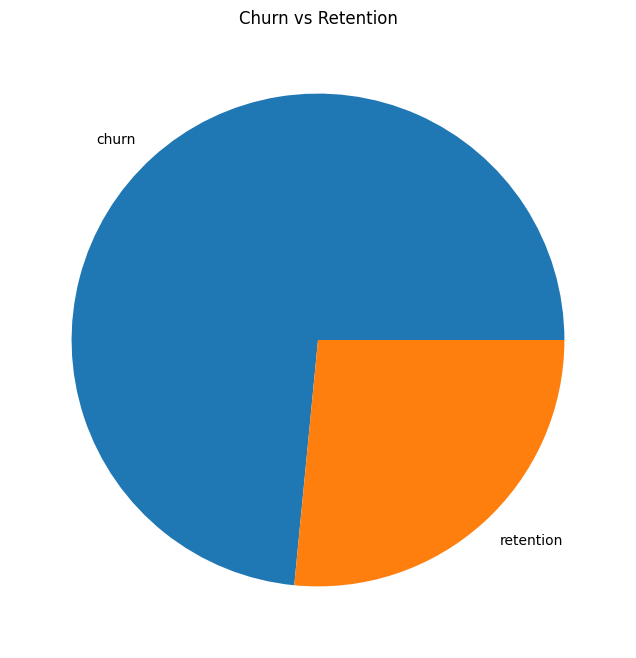

In [128]:
plt.figure(figsize=(12, 8))
plt.pie(
    x = df["Churn Label"].value_counts(),
    labels = ["churn", "retention"]
)

plt.title('Churn vs Retention')
plt.show()

In [129]:
df.head()

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Los Angeles,90005,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Los Angeles,90006,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,Los Angeles,90010,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Los Angeles,90015,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [131]:
df_churned = df[df["Churn Label"] == "Yes"]
df_churned.shape

(1869, 26)

In [132]:
df_retentioned = df[df["Churn Label"] == "No"]
df_retentioned.shape

(5174, 26)